In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10 

In [2]:
from keras.datasets import cifar10
# Load pre-shuffled cifar10 data into train and test sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [3]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
##The first step of any Machine Learning, Deep Learning or Data Science project is to pre-process the data. We will be defining the names of the classes, over which the dataset is distributed. There are 10 different classes of color images of size 32x32. Once we have set the class name. We need to normalize the image so that our model can train faster. The pixel range of a color image is 0–255. We will be dividing each pixel of the image by 255 so the pixel range will be between 0–1. Actually, we will be dividing it by 255.0 as it is a float operation. For the model, we will be using Convolutional Neural Networks (CNN).

In [7]:
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']


In [8]:
X_train=X_train/255.0
X_train.shape
X_test=X_test/255.0
X_test.shape

(10000, 32, 32, 3)

In [9]:
X_train.shape

(50000, 32, 32, 3)

In [10]:
X_test.shape

(10000, 32, 32, 3)

In [11]:
cifar10_model=tf.keras.models.Sequential()
# First Layer
cifar10_model.add(tf.keras.layers.Conv2D(filters=32,
                                         kernel_size=3, 
                                         padding='same', 
                                         activation='relu', 
                                         input_shape=[32,32,3]))

In [12]:
#MaxPoolingLayer
cifar10_model.add(tf.keras.layers.MaxPool2D(pool_size=2,
                                            strides=2, 
                                            padding='valid'))

In [13]:
# Flattening Layer
cifar10_model.add(tf.keras.layers.Flatten())

In [14]:

# Adding the first fully connected layer
cifar10_model.add(tf.keras.layers.Dense(units= 128,
                                        activation='relu'))

In [15]:
# Output Layer
cifar10_model.add(tf.keras.layers.Dense(units=10,activation='softmax'))

In [16]:
cifar10_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1048704   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 1,050,890
Trainable params: 1,050,890
Non-trainable params: 0
_________________________________________________________________


In [17]:
cifar10_model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])

In [18]:

cifar10_model.fit(X_train,y_train,epochs=15)

Epoch 1/15
1563/1563 [==============================] - 36s 3ms/step - loss: 1.4423 - sparse_categorical_accuracy: 0.4862
Epoch 2/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1348 - sparse_categorical_accuracy: 0.6024
Epoch 3/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0041 - sparse_categorical_accuracy: 0.6503
Epoch 4/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9196 - sparse_categorical_accuracy: 0.6799
Epoch 5/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8506 - sparse_categorical_accuracy: 0.7025
Epoch 6/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7921 - sparse_categorical_accuracy: 0.7245
Epoch 7/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7358 - sparse_categorical_accuracy: 0.7428
Epoch 8/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6859 - sparse_categorical_accuracy: 0.7577
Epoch 9/15
1563/1563 [=========

In [ ]:
#cifar10_model.fit(X_train,y_train,epochs=100)

Epoch 1/100
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8580 - sparse_categorical_accuracy: 0.7013
Epoch 2/100
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8489 - sparse_categorical_accuracy: 0.7045
Epoch 3/100
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8380 - sparse_categorical_accuracy: 0.7062
Epoch 4/100
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8219 - sparse_categorical_accuracy: 0.7140
Epoch 5/100
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8156 - sparse_categorical_accuracy: 0.7180
Epoch 6/100
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8058 - sparse_categorical_accuracy: 0.7172
Epoch 7/100
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7963 - sparse_categorical_accuracy: 0.7217
Epoch 8/100
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7856 - sparse_categorical_accuracy: 0.7277
Epoch 9/100
1563/1563 [=

In [ ]:

#cifar10_model.fit(X_train,y_train,epochs=50)

Epoch 1/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4729 - sparse_categorical_accuracy: 0.8311
Epoch 2/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4703 - sparse_categorical_accuracy: 0.8326
Epoch 3/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4706 - sparse_categorical_accuracy: 0.8314
Epoch 4/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4700 - sparse_categorical_accuracy: 0.8320
Epoch 5/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4706 - sparse_categorical_accuracy: 0.8313
Epoch 6/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4675 - sparse_categorical_accuracy: 0.8318
Epoch 7/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4681 - sparse_categorical_accuracy: 0.8331
Epoch 8/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4683 - sparse_categorical_accuracy: 0.8311
Epoch 9/50
1563/1563 [==========

In [ ]:
cifar10_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4888 - sparse_categorical_accuracy: 0.6516


[1.488828182220459, 0.6516000032424927]

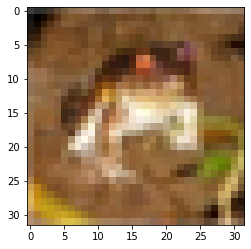

In [19]:
plt.imshow(X_train[0])

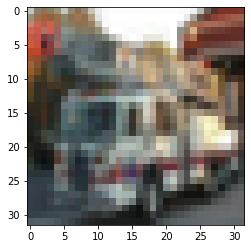

In [20]:
plt.imshow(X_train[900])

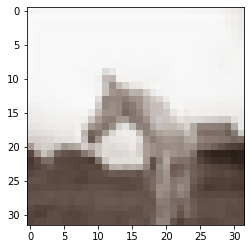

In [21]:
plt.imshow(X_test[87])

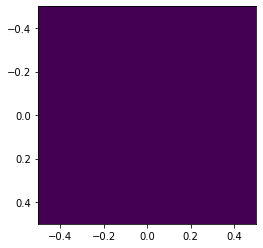

In [22]:
plt.imshow(y_train[[90]])

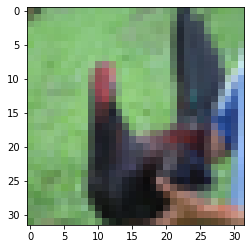

In [23]:
plt.imshow(X_test[25])

In [25]:
X_train.shape

(50000, 32, 32, 3)

I want to predict the first image belongs to which class ?

In [35]:
y_train[0]            # i know it belongs to class 6

array([6], dtype=uint8)

I predict the output

In [27]:
X_new = X_train[0]

In [33]:
y_pred = cifar10_model.predict_classes(X_train[0:1:1])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [36]:
y_pred           # my prediction is correct because my model give me correct result

array([6])

In [37]:
import numpy as np


In [38]:
np.array(class_names)[y_pred]

array(['frog'], dtype='<U10')

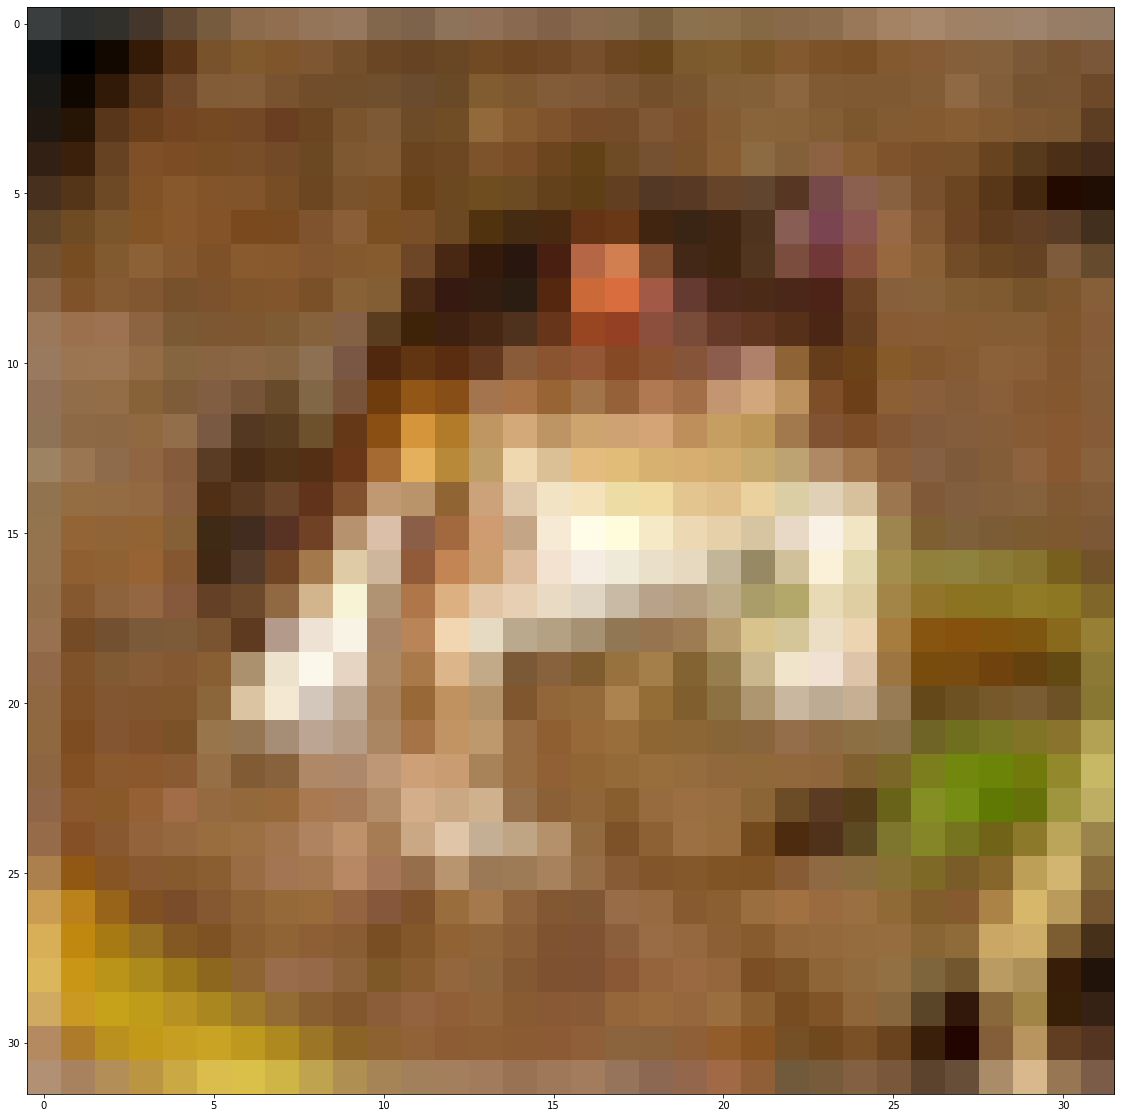

In [42]:
plt.figure(figsize=(50,20))
plt.imshow(X_train[0])